In [46]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Regressão Logística

Vimos nas aulas anteriores modelos lineares de regressão, onde o valor predito do *target* era modelado como uma combinação linear de atributos (incluindo o termo constante):

$$
\hat{y} = 
\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n = 
\begin{bmatrix}
1 & x_0 & x_1 & x_2 & \cdots & x_n
\end{bmatrix}
\cdot
\begin{bmatrix}
\theta_0 \\
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_n
\end{bmatrix}
= \utilde{\mathbf{x}}^T \mathbf{\theta}
$$

Os parâmetros ótimos do nosso modelo são aqueles que minimizam o erro quadrático médio (em inglês: *mean squared error* - MSE):

$$
\text{MSE}(\theta) = 
\frac{1}{m} \sum_{i = 1}^{m} \left( \hat{y}^{(i)} - y^{(i)}\right)^2 = 
\frac{1}{m} \sum_{i = 1}^{m} \left( (\utilde{\mathbf{x}}^{(i)})^T \theta - y^{(i)} \right)^2
$$

Em notação matricial:

- Conjunto de exemplos: matriz de *features* $\mathbf{X}$ e matriz-coluna de valores *target* $\mathbf{y}$

$$
\mathbf{X} = \left[
\begin{matrix}
x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)} \\
\end{matrix}
\right]\, , \quad
\mathbf{y} = \left[
\begin{matrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)} \\
\end{matrix}
\right]
$$

- Modelo: matriz de *features* aumentada $\utilde{\mathbf{X}}$ (a matriz $\mathbf{X}$ com uma coluna de valores $1$ a mais), matriz-coluna de parâmetros $\mathbf{\theta}$, matriz-coluna de valores preditos $\hat{\mathbf{y}}$

$$
\utilde{\mathbf{X}} = \left[
\begin{matrix}
1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)} \\
\end{matrix}
\right]\, , \quad
\mathbf{\theta} = \left[
\begin{matrix}
\theta_0 \\
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_n \\
\end{matrix}
\right]\, , \quad
\hat{\mathbf{y}} = \left[
\begin{matrix}
\hat{y}^{(1)} \\
\hat{y}^{(2)} \\
\vdots \\
\hat{y}^{(m)} \\
\end{matrix}
\right]
$$

$$
\Rightarrow \boxed{\hat{\mathbf{y}} = \utilde{\mathbf{X}} \mathbf{\theta}}
$$


- Função de perda de regressão: comumente usamos o MSE

$$
\text{MSE}(\mathbf{\theta}) = 
\frac{1}{m}
\left(\hat{\mathbf{y}} - \mathbf{y}\right)^T
\left(\hat{\mathbf{y}} - \mathbf{y}\right)
$$

As vezes, um modelo de regressão pode ser adaptado para um modelo de classificação e vice-versa. Este é o caso da ***regressão logística***, que apesar do nome *não é um método de regressão*, mas sim um método de classificação!


## O problema: classificação binária

Suponha que tenhamos os seguintes dados que relacionam o número de horas de estudo de um aluno com o resultado de uma prova (0: não passou; 1: passou):

| horas| passou? |
|---|---|
| 3.75 | 0.0 |
| 9.51 | 1.0 |
| 7.32 | 0.0 |
| 5.99 | 1.0 |
| 1.56 | 0.0 |
| 1.56 | 0.0 |
| 0.58 | 0.0 |
| 8.66 | 1.0 |
| 6.01 | 1.0 |
| 7.08 | 1.0 |
| 0.21 | 0.0 |
| 9.70 | 1.0 |
| 8.32 | 0.0 |
| 2.12 | 0.0 |
| 1.82 | 0.0 |
| 1.83 | 0.0 |
| 3.04 | 0.0 |
| 5.25 | 1.0 |
| 4.32 | 0.0 |
| 2.91 | 0.0 |
| 6.12 | 1.0 |
| 1.39 | 0.0 |
| 2.92 | 1.0 |
| 3.66 | 1.0 |
| 4.56 | 0.0 |
| 7.85 | 1.0 |
| 2.00 | 0.0 |
| 5.14 | 0.0 |
| 5.92 | 0.0 |
| 0.46 | 0.0 |

Eis um gráfico para ajudar a visualizar esses dados:

![passou ou não](alunos.png "Resultado do teste versus número de horas de estudo")

Parece que se um aluno não estuda não passa, e se estuda bastante passa. E no meio do caminho? Como estimar a chance de que o aluno passe se estudar $7$ horas, por exemplo? Parece que precisamos de uma função interpoladora aqui! Existem várias opções de função interpoladora, vamos estudar uma delas: a **função logística**.

## Função logística

Para adaptar a regressão linear para a regressão logística (que não é regressão, mas sim um método de classificação), precisamos da *função logística*:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Esta função se comporta da seguinte maneira:

- Para valores muito negativos de $x$ temos $\lim_{x \rightarrow -\infty} \sigma(x) = 0$ pois o denominador da fração vai para infinito.

- Para valores muito positivos de $x$ temos $\lim_{x \rightarrow \infty} \sigma(x) = 1$ pois $e^{-x}$ vai para zero.

- Para $x = 0$ temos $\sigma(0) = 0.5$

Eis a cara dessa função:

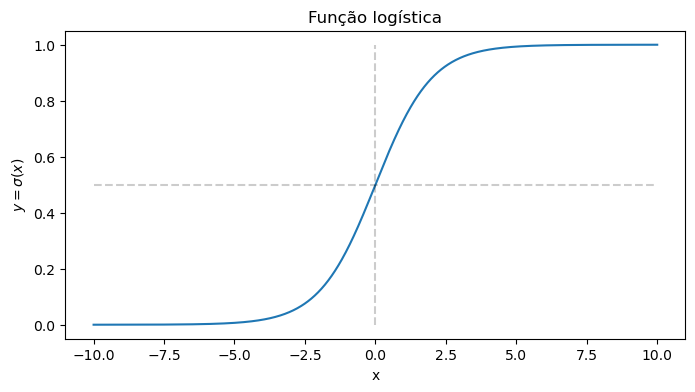

In [47]:
# Gera valores da função logística entre -10 e 10.
x = np.linspace(-10, 10, 1000)
y = 1.0 / (1.0 + np.exp(-x))

plt.figure(figsize=(8, 4))

# Plota a função logística.
plt.plot(x, y)

# Plota linhas auxiliares só para visualizar melhor.
plt.plot([0, 0], [0, 1], 'k--', alpha=0.2)
plt.plot([-10, 10], [0.5, 0.5], 'k--', alpha=0.2)

# Resto do gráfico: titulo, labels, etc.
plt.title('Função logística')
plt.xlabel('x')
plt.ylabel('$y = \sigma(x)$')

plt.show()

A função logística tem um formato *sigmoide* (ou seja, em forma de "s").

---

**Atividade:** Como você faria (matematicamente) para:

- Deslocar a função logística para a direita?

- Aumentar a largura da "zona de transição de zero para um"?

**R:**

---

Podemos tentar ajustar uma função logística aos nossos dados dos alunos - essa é a base da regressão logística (que não é regressão, mas sim um método de classificação).

![passou ou não prob](alunos_prob.png "Probabilidade de aprovação versus número de horas de estudo")

Se tivermos que apostar se um aluno passa ou não de acordo com o número de horas de estudo deste, o melhor é adotar uma *regra de decisão* do tipo:

- $\hat{p}$ (probabilidade estimada) maior ou igual que $50\%$: acho que passa.

- $\hat{p}$ menor que $50\%$: acho que não passa.

Temos agora um classificador de aluno! Eis o gráfico deste classificador em cima dos dados:

![passou ou não class](alunos_class.png "Vai passar ou não? versus número de horas de estudo")

Essa é a idéia da regressão logística (que não é regressão, mas sim um método de classificação). Vamos estudar agora mais a fundo esse modelo, e como fazer para descobrir os parâmetros da função logística.

---

**Atividade**

- Qual o *precision*, *recall* e acurácia deste exemplo?

- Se eu quisesse garantir uma chance de aprovação de mais de $80\%$, quantas horas um aluno deveria estudar? 

**R:**

---

## Modelo de regressão logística (que não é regressão, mas sim um método de classificação)

Em um modelo de regressão linear estamos prevendo o valor da variável dependente. Em uma regressão logística (que não é regressão, mas sim um método de classificação), o que estamos tentando prever? Como se trata de um método de classificação, estamos tentando prever a classe $y$ de um objeto de atributos $\mathbf{x}$. Esta classe deverá ser binária: zero ou um, negativo ou positivo. A regressão logística (que não é regressão, mas sim um método de classificação) atinge este objetivo da seguinte forma:

- Para um conjunto de parâmetros $\theta$, calcule a probabilidade (segundo o modelo) de que o objeto de atributos $\mathbf{x}$ seja da classe positiva:

$$
\hat{p} = \sigma(\utilde{\mathbf{x}}^{T} \theta)
$$

Esta será a nossa função de decisão!

(Como encontrar $\theta$? Esse é o objetivo do algoritmo de treinamento, que vamos ver mais abaixo.)

- Determine a classe do objeto usando o threshold $0.5$:

$$
\hat{y} = \left\{ 
\begin{matrix}
0, \text{ se } \hat{p} < 0.5 \\
1, \text{ se } \hat{p} \ge 0.5 \\
\end{matrix}
\right. 
$$

## Função de custo

Para obter o valor ótimo dos parâmetros $\theta$ de um modelo de regressão logística temos que definir uma função de custo. Existem inúmeras possibilidades: basta escolher uma estratégia que penalize os erros e/ou valorize os acertos.

Uma opção bastante conveniente (veremos depois porque) de função de custo para um dado objeto $(\mathbf{x}, y)$ e um vetor de parâmetros $\theta$ é a seguinte:

- A probabilidade predita é $\hat{p} = \sigma(\utilde{\mathbf{x}}^T \theta)$

- Se a classe real $y$ for 1, a função de custo será $\ell = -\log{(\hat{p})}$

![](custo_y1.png)
    
- Se a classe real $y$ for 0, a função de custo será $\ell = -\log{(1 - \hat{p})}$

![](custo_y0.png)

--- 

**Atividade**

Explique porque esta é uma função de custo que funciona.

**R:**

---

Um jeito "espertinho" de escrever a função de custo de uma maneira que já incorpora tando o caso $y = 0$ como $y = 1$ é o seguinte:

$$
\ell = - \left(y \log{(\hat{p})} + (1 - y) \log{(1 - \hat{p})}\right)
$$

Pois,

- se $y = 1$, a função $\ell$ simplifica para 

$$
\begin{align*}
y = 1 \Rightarrow \ell 
& = - \left( 1 \log{(\hat{p})} + (1 - 1) \log{(1 - \hat{p})}\right) \\
& = - \left( 1 \log{(\hat{p})} + 0 \log{(1 - \hat{p})}\right) \\
& = - \log{(\hat{p})} \\
\end{align*}
$$

- se $y = 0$, a função $\ell$ simplifica para 

$$
\begin{align*}
y = 0 \Rightarrow \ell 
& = - \left( 0 \log{(\hat{p})} + (1 - 0) \log{(1 - \hat{p})}\right) \\
& = - \left( 0 \log{(\hat{p})} + 1 \log{(1 - \hat{p})}\right) \\
& = - \log{(1 - \hat{p})} \\
\end{align*}
$$

A função de custo completa, para todas as amostras, é o custo médio por amostra:

$$
\mathcal{L}(\theta) =
- \frac{1}{m} \sum_{i = 1}^{m} 
\left(
    y^{(i)} \log{\left(\hat{p}^{(i)}\right)} + 
    \left(1 - y^{(i)}\right) \left(\log{\left(1 - \hat{p}^{(i)}\right)}\right)
\right)
$$

Diferentemente do caso da regressão linear, aqui não temos uma solução fechada como a equação normal. Só nos resta o *gradient descent*. A boa notícia é que com essa função de custo as derivadas parciais são surpreendentemente simples:

$$
\frac{\partial}{\partial \theta_j} \mathcal{L}(\mathbf{\theta}) =
\frac{1}{m} 
\sum_{i = 1}^{m} 
\left( \hat{p}^{(i)} - y^{(i)} \right)
\utilde{\mathbf{x}}_{j}^{(i)}
$$

Em notação matricial:

$$\boxed{
    \nabla \mathcal{L}(\mathbf{\theta}) =
    \frac{1}{m} \utilde{\mathbf{X}}^T \left( \hat{\mathbf{p}} - \mathbf{y} \right)
}
$$


## Iris: o verdadeiro "Hello, world!" dos modelos preditivos!

In [48]:
from sklearn import datasets

iris = datasets.load_iris()

In [49]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [50]:
print(list(iris.keys()))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [51]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [52]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**Atividade**

Construa um classificador por regressão logística para separar as flores do tipo 'Iris Versicolor' das demais usando as características 'petal length (cm)' e 'petal width (cm)'. Como resultado final, apresente:

- Acurácia do classificador no conjunto de testes.
- Curva ROC e respectiva área.
- Um diagrama ilustrando a probabilidade da classe positiva. 
    - Dica: veja https://matplotlib.org/gallery/images_contours_and_fields/contour_demo.html

Use seu arsenal de ferramentas de validação para encontrar o melhor modelo.

In [53]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

X = X[['petal length (cm)', 'petal width (cm)']].values
y = (y == 1)

In [54]:
X.shape, y.shape

((150, 2), (150,))

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=RANDOM_SEED,
)

In [56]:
X_pos = X_train[y_train == 1]
X_neg = X_train[y_train == 0]

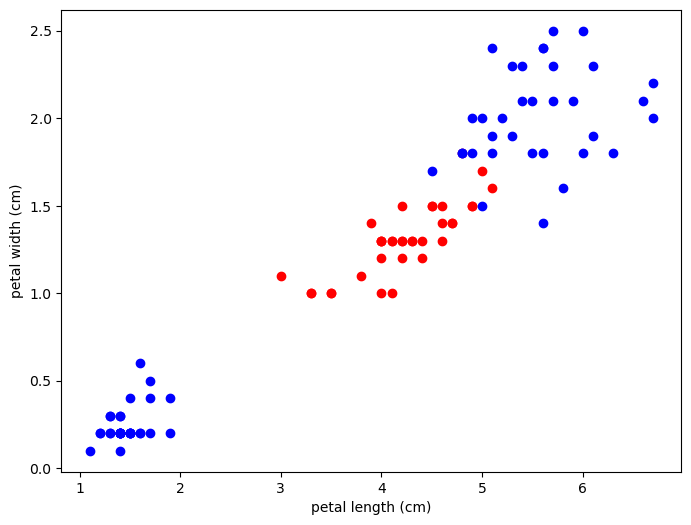

In [57]:
f1 = 'petal length (cm)'
f2 = 'petal width (cm)'

plt.figure(figsize=(8, 6))
plt.plot(X_pos[:, 0], X_pos[:, 1], 'ro')
plt.plot(X_neg[:, 0], X_neg[:, 1], 'bo')
plt.xlabel(f1)
plt.ylabel(f2)
plt.show()

In [58]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score

print(f'accuracy: {100*accuracy_score(y_test, y_pred):.2f} %')

accuracy: 64.00 %


In [60]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]

In [61]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [62]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC = {auc:.3f}')

AUC = 0.787


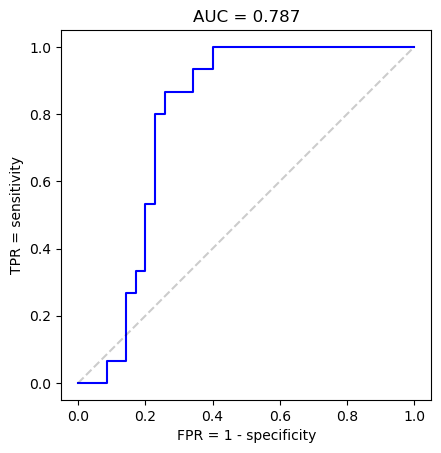

In [63]:
plt.figure()
plt.plot(fpr, tpr, 'b-')
plt.plot([0.0, 1.0], [0.0, 1.0], 'k--', alpha=0.2)
plt.xlabel('FPR = 1 - specificity')
plt.ylabel('TPR = sensitivity')
plt.title(f'AUC = {auc:.3f}')
plt.axis('square')
plt.show()

In [64]:
def plot_contours(X, y, model, title):
    u = np.arange(0.5, 7.25, 0.05)
    v = np.arange(-0.25, 3.25, 0.05)
    U, V = np.meshgrid(u, v)

    X_test_plot = np.c_[U.reshape(U.size, 1), V.reshape(V.size, 1)]
    X_test_plot = pd.DataFrame(X_test_plot)
    y_test_plot = model.predict_proba(X_test_plot)
    y_test_plot = y_test_plot[:, 1].reshape(U.shape)

    plt.figure(figsize=(8, 6))
    CS = plt.contour(
        U,
        V,
        y_test_plot,
        np.linspace(
            start=0.0,
            stop=1.0,
            num=11,
            endpoint=True,
        ),
    )
    plt.clabel(CS, inline=1, fontsize=10)

    X_pos = X[y]
    X_neg = X[~y]

    plt.plot(X_pos[:, 0], X_pos[:, 1], 'ro', label='Versicolor')
    plt.plot(X_neg[:, 0], X_neg[:, 1], 'bo', label='Virginica ou Setosa')
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.legend()
    plt.title(title)
    plt.show()

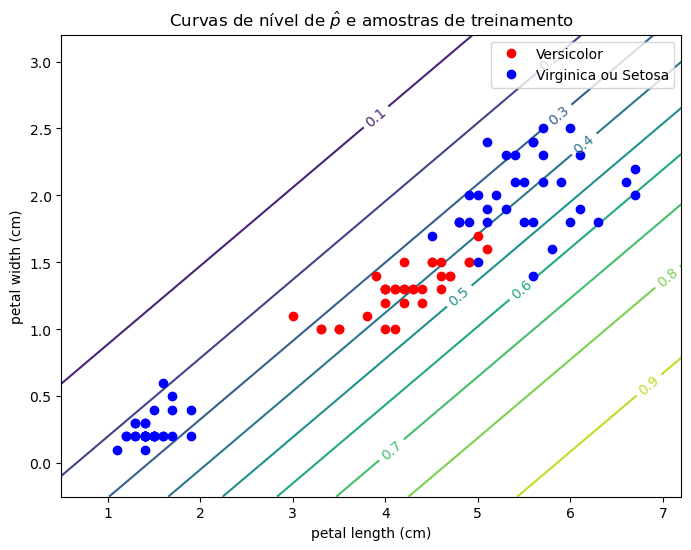

In [65]:
plot_contours(
    X_train,
    y_train,
    model,
    'Curvas de nível de $\hat{p}$ e amostras de treinamento',
)

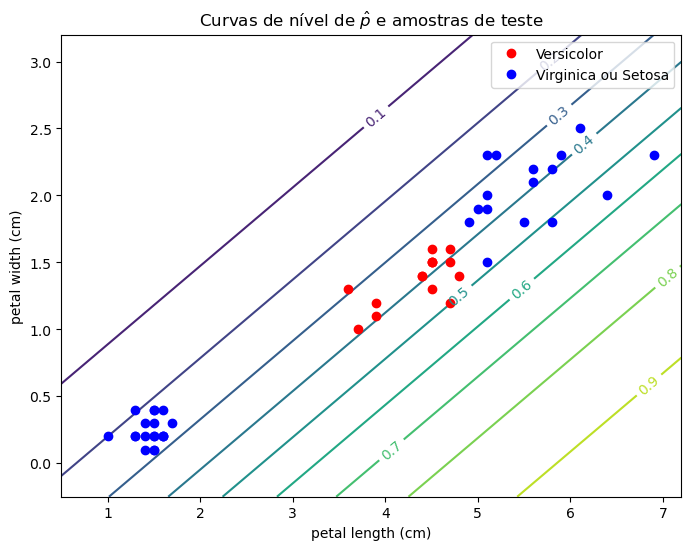

In [66]:
plot_contours(
    X_test,
    y_test,
    model,
    'Curvas de nível de $\hat{p}$ e amostras de teste',
)

Ok, o modelo simples é bem ruinzinho...

Vamos tentar um modelo mais complexo, e vamos fazer uma seleção de hiperparâmetros:

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1)),
    ('clf', LogisticRegression(
        penalty='l1',
        solver='liblinear',
        max_iter=1000,
    )),
])

params = {
    'poly__degree': [1, 2, 3, 4],
    'clf__C': [2**k for k in range(-10, 11)],
    'clf__penalty': ['l1', 'l2']
}
clf = GridSearchCV(pipe, params, cv=5, n_jobs=-1)

clf.fit(X_train, y_train)
print(clf.best_params_)

y_pred = clf.predict(X_test)

{'clf__C': 0.0625, 'clf__penalty': 'l2', 'poly__degree': 3}


In [68]:
from sklearn.metrics import accuracy_score

print(f'accuracy: {100*accuracy_score(y_test, y_pred):.2f} %')

accuracy: 100.00 %


In [69]:
y_pred_prob = clf.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]

In [70]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [71]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC = {auc:.3f}')

AUC = 1.000


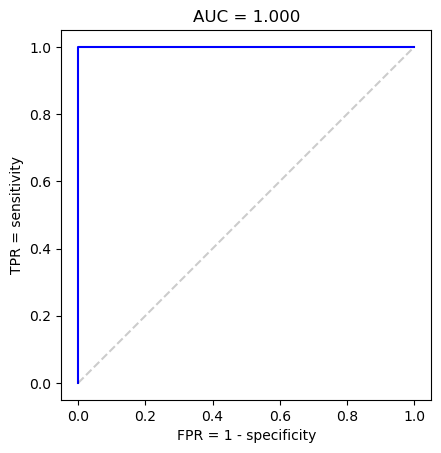

In [72]:
plt.figure()
plt.plot(fpr, tpr, 'b-')
plt.plot([0.0, 1.0], [0.0, 1.0], 'k--', alpha=0.2)
plt.xlabel('FPR = 1 - specificity')
plt.ylabel('TPR = sensitivity')
plt.title(f'AUC = {auc:.3f}')
plt.axis('square')
plt.show()

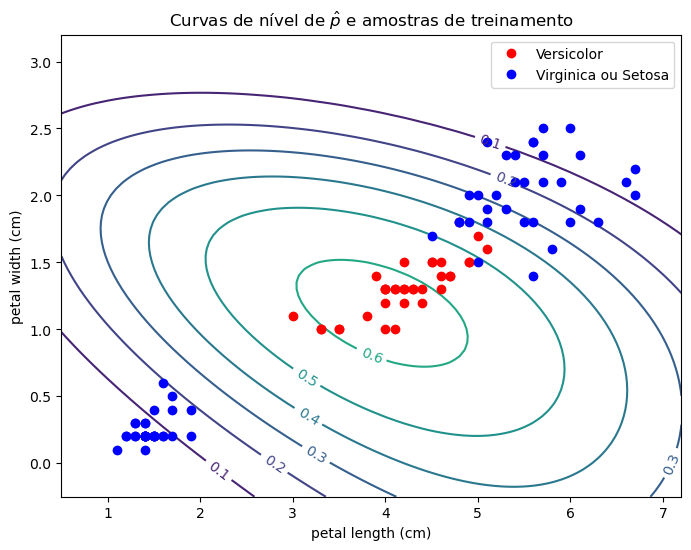

In [73]:
plot_contours(
    X_train,
    y_train,
    clf,
    'Curvas de nível de $\hat{p}$ e amostras de treinamento',
)

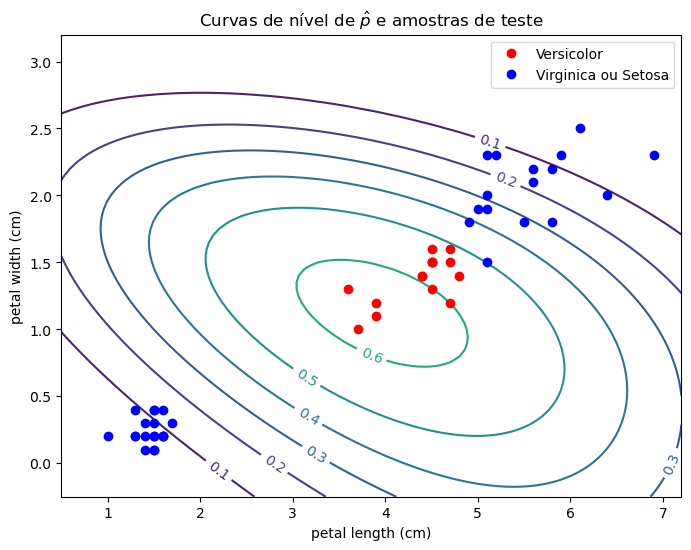

In [74]:
plot_contours(
    X_test,
    y_test,
    clf,
    'Curvas de nível de $\hat{p}$ e amostras de teste',
)

## Classificação multiclasse

Regressão linear é bacana, mas só serve para classificação binária. Se nosso problema for de classificação multiclasse, como proceder? Uma alternativa é recorrer às técnicas de "One-Versus-One" e "One-Versus-All" vista nas aulas passadas.

Mas temos uma alternativa melhor aqui: podemos generalizar a técnica de regressão linear para a situação de várias classes: esta é a regressão linear multiclasse, ou regressão *softmax*.

### Função softmax

A regressão logística consiste em ajustar aos dados (via minimização da função de custo) uma curva logística. Isso pode ser quebrado em duas partes:

- Calcular o *score* do objeto, que é $\utilde{\mathbf{x}}^T \theta$

- Passar o *score* pela função logística: $\hat{p} = \sigma(score)$

E se tivéssemos várias classes? Uma possibilidade é a seguinte:

- Para cada classe, calcule um *score* desta classe para o objeto: $s_k = \utilde{\mathbf{x}}_k^T \theta_k$. Note que agora temos um vetor de parâmetros $\theta_k$ por classe $k$.

- Normalize esses *scores* com o auxílio da *função softmax*:

$$
\hat{p}_k = \sigma(s(\mathbf{x}))_k = \frac{\exp\left( s_k(\mathbf{x}) \right)}{\sum_{j=1}^{K} \exp\left( s_j(\mathbf{x}) \right)}
$$

A classe atribuida ao objeto será então $\arg \max_k \sigma(s(\mathbf{x}))_k$

## Entropia cruzada

A função de custo da regressão *softmax* é muito parecida com a função de custo da regressão logística binária:

$$
\begin{align*}
y = 0 \Rightarrow & \ell = -\log{\hat{p}_0} \\
y = 1 \Rightarrow & \ell = -\log{\hat{p}_1} \\
\vdots & \\
y = C - 1 \Rightarrow & \ell = -\log{\hat{p}_{(C - 1)}} \\
\end{align*}
$$

Podemos novamente combinar as várias opções acima em uma única expressão:

$$
\ell = - \sum_{k = 0}^{C - 1} [y = k] \log{(\hat{p}_k)}
$$

onde a notação $[y = k]$ vale $1$ se a condição é verdadeira, e $0$ caso contrário. Esta notação chama-se "colchetes de Iverson" ("*Iverson's brackets*").

Esta expressão lembra a fórmula da *entropia cruzada* entre $\mathbf{y}$ e $\mathbf{\hat{p}}$. Esta é uma medida que vem da teoria da informação. Por conta desta coincidencia, esta perda é chamada de *perda de entropia cruzada*.

A perda total sobre um *dataset* é o valor médio de $\ell$ sobre todos os exemplos:

$$
\mathcal{L}(\theta) = - \frac{1}{m} \sum_{i = 1}^{m} \sum_{k = 0}^{C - 1} \left[y^{(i)} = k\right] \log{\left(\hat{p}_k^{(i)}\right)}
$$



**Atividade:** Repita a atividade de classificação do dataset 'Iris' usando apenas as características 'petal length (cm)' e 'petal width (cm)'. Use seu arsenal de ferramentas de validação para encontrar o melhor modelo.

**Atividade:** Repita a atividade anterior usando todas as quatro características originais. Qual o aumento de desempenho?